In [1]:
!pip3 install torch torchvision torchaudio
!git clone https://github.com/ultralytics/yolov5


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'yolov5'...
remote: Enumerating objects: 15647, done.
remote: Counting objects: 100% (254/254), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 15647 (delta 128), reused 174 (delta 100), pack-reused 15393
Receiving objects: 100% (15647/15647), 14.65 MiB | 11.29 MiB/s, done.
Resolving deltas: 100% (10652/10652), done.


In [2]:
!cd yolov5 && pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.0 MB/s eta 0:00:00


In [3]:
!git clone https://github.com/looloo404/BootCamp.git

Cloning into 'BootCamp'...
remote: Enumerating objects: 1170, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 1170 (delta 2), reused 168 (delta 0), pack-reused 998
Receiving objects: 100% (1170/1170), 124.07 MiB | 24.34 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = './BootCamp/test_project_weights650/weights/best.pt',force_reload = True)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-5-9 Python-3.10.11 torch-2.0.0+cu118 CPU



requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [6]:
# 이미지로 테스트

import os
cwd = os.getcwd()
yolov5 = os.path.join(cwd,'BootCamp','sample_data','images')

img = os.path.join(yolov5 , 'awake.4320dd2a-e9bf-11ed-b36b-d85ed396df9e.jpg')
results = model(img)
results.print()

image 1/1: 480x640 1 awake
Speed: 51.0ms pre-process, 287.0ms inference, 26.6ms NMS per image at shape (1, 3, 480, 640)


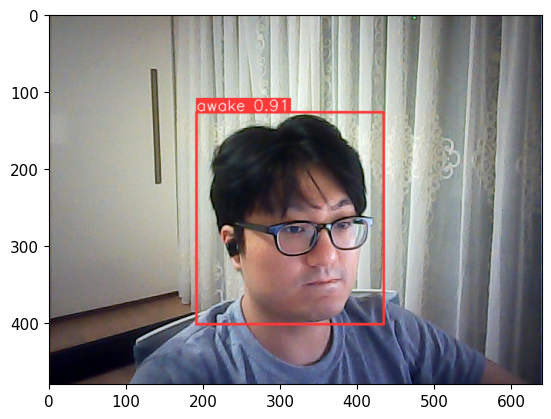

In [7]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
# 비디오 카메라로 인식하는 겁니다. 주피터로 한번 돌려보세요
# 구글 코랩에서는 카메라 접근이 안된답니다. 주피터에서 실행해보세요
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
    